In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain
%pip install torchlibrosa

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.RNN import GRU
from genrecog.tools.trainer import RNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model = GRU(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=True
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

GRU(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (glu): GRU(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
trainer = RNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 33.78
Training loss 1.8400
Validation accuracy 22.50
Validation loss 2.2560
============================== EPOCH 2 =================================
Training accuracy 43.78
Training loss 1.5368
Validation accuracy 15.00
Validation loss 2.1215
============================== EPOCH 3 =================================
Training accuracy 48.37
Training loss 1.4280
Validation accuracy 31.50
Validation loss 1.8950
============================== EPOCH 4 =================================
Training accuracy 53.19
Training loss 1.3299
Validation accuracy 48.75
Validation loss 1.6869
============================== EPOCH 5 =================================
Training accuracy 57.06
Training loss 1.2333
Validation accuracy 54.75
Validation loss 1.5364
============================== EPOCH 6 =================================
Training accuracy 59.87
Training loss 1.1628
Validation accuracy 56.00
Validation loss 1.367

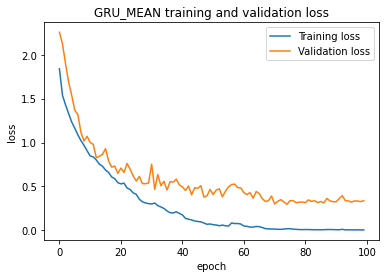

In [8]:
trainer.plot_loss("GRU_MEAN training and validation loss")

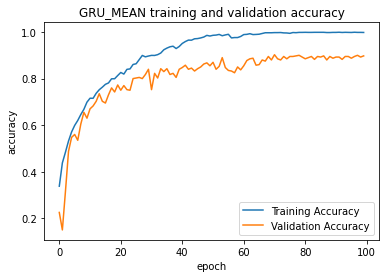

In [9]:
trainer.plot_accuracies("GRU_MEAN training and validation accuracy")

In [10]:
trainer.eval(test_dataloader)

(tensor([6, 4, 6, 6, 5, 3, 0, 6, 9, 9, 4, 9, 9, 1, 0, 9, 3, 2, 7, 4, 0, 8, 3, 8,
         0, 3, 2, 3, 3, 6, 3, 0, 4, 3, 4, 3, 7, 8, 7, 3, 6, 2, 2, 6, 1, 2, 2, 0,
         5, 6, 5, 4, 9, 6, 2, 8, 8, 4, 0, 8, 9, 4, 1, 1, 6, 5, 9, 5, 6, 4, 4, 0,
         2, 6, 2, 6, 6, 2, 6, 0, 8, 2, 2, 4, 6, 2, 0, 3, 8, 4, 0, 3, 1, 8, 4, 0,
         1, 7, 8, 1, 2, 4, 3, 8, 2, 7, 4, 8, 6, 8, 8, 8, 0, 6, 5, 6, 6, 7, 9, 3,
         2, 0, 5, 1, 8, 6, 1, 1, 3, 8, 3, 0, 4, 7, 2, 0, 2, 1, 4, 5, 9, 9, 4, 7,
         5, 4, 3, 2, 2, 2, 4, 0, 7, 3, 1, 8, 8, 0, 4, 4, 0, 5, 2, 2, 6, 8, 2, 8,
         5, 9, 1, 0, 4, 5, 0, 1, 0, 6, 4, 2, 0, 2, 0, 4, 2, 6, 0, 9, 6, 2, 1, 7,
         9, 9, 9, 0, 7, 8, 9, 8, 5, 4, 9, 7, 8, 3, 3, 7, 0, 1, 4, 5, 7, 2, 5, 8,
         6, 2, 9, 7, 2, 3, 9, 5, 7, 3, 2, 2, 5, 0, 3, 6, 5, 8, 0, 0, 0, 4, 0, 5,
         9, 2, 1, 9, 9, 5, 2, 7, 4, 2, 5, 4, 8, 1, 8, 9, 3, 4, 3, 8, 8, 0, 4, 3,
         0, 5, 8, 0, 0, 9, 7, 7, 5, 0, 6, 3, 4, 3, 1, 1, 2, 0, 2, 0, 4, 3, 0, 6,
         6, 5, 2, 3, 8, 0, 5

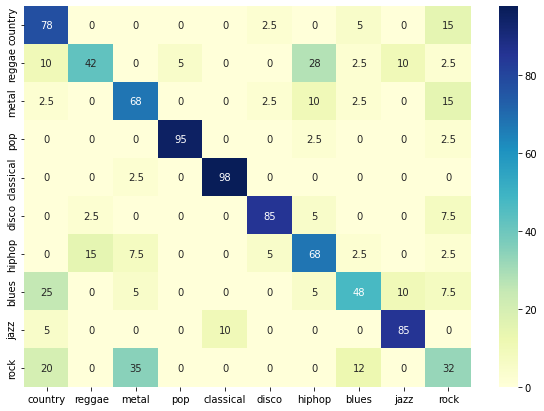

In [11]:
trainer.plot_confusion_matrix(test_dataloader)

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.55      0.78      0.65        40
      reggae       0.71      0.42      0.53        40
       metal       0.57      0.68      0.62        40
         pop       0.95      0.95      0.95        40
   classical       0.91      0.97      0.94        40
       disco       0.89      0.85      0.87        40
      hiphop       0.57      0.68      0.62        40
       blues       0.66      0.47      0.55        40
        jazz       0.81      0.85      0.83        40
        rock       0.38      0.33      0.35        40

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.69       400
weighted avg       0.70      0.70      0.69       400



In [22]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model_2 = GRU(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=True
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

GRU(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (glu): GRU(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [23]:
trainer_2 = RNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=70)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 34.84
Training loss 1.8156
Validation accuracy 15.75
Validation loss 2.2638
============================== EPOCH 2 =================================
Training accuracy 45.47
Training loss 1.5241
Validation accuracy 26.00
Validation loss 2.1259
============================== EPOCH 3 =================================
Training accuracy 50.87
Training loss 1.4196
Validation accuracy 42.75
Validation loss 1.9212
============================== EPOCH 4 =================================
Training accuracy 53.62
Training loss 1.3157
Validation accuracy 51.50
Validation loss 1.7225
============================== EPOCH 5 =================================
Training accuracy 57.37
Training loss 1.2127
Validation accuracy 60.00
Validation loss 1.4957
============================== EPOCH 6 =================================
Training accuracy 59.97
Training loss 1.1305
Validation accuracy 59.75
Validation loss 1.286

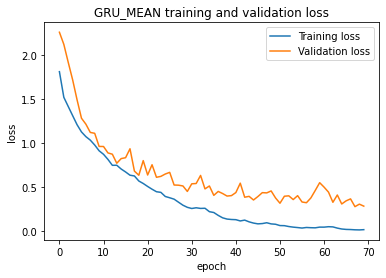

In [24]:
trainer_2.plot_loss("GRU_MEAN training and validation loss")

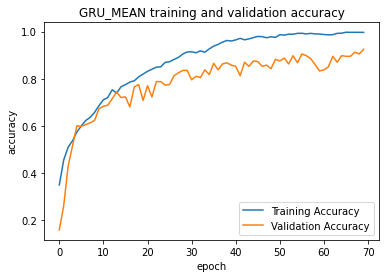

In [25]:
trainer_2.plot_accuracies("GRU_MEAN training and validation accuracy")

In [26]:
trainer_2.eval(test_dataloader)

(tensor([3, 5, 4, 3, 5, 2, 9, 4, 1, 0, 5, 0, 3, 4, 4, 5, 1, 7, 0, 0, 5, 5, 0, 0,
         7, 4, 0, 1, 5, 6, 8, 9, 8, 7, 1, 2, 4, 2, 3, 5, 8, 4, 1, 5, 7, 4, 5, 4,
         1, 6, 0, 9, 5, 1, 5, 7, 2, 3, 8, 5, 7, 6, 5, 1, 8, 8, 4, 9, 8, 1, 5, 7,
         5, 2, 9, 7, 3, 4, 8, 4, 5, 6, 0, 5, 3, 0, 4, 9, 9, 8, 5, 5, 0, 4, 0, 0,
         4, 3, 0, 1, 2, 2, 0, 2, 0, 0, 8, 8, 7, 1, 2, 9, 8, 6, 0, 2, 4, 4, 4, 2,
         4, 5, 2, 2, 9, 9, 5, 3, 7, 2, 0, 8, 0, 0, 0, 5, 0, 8, 2, 1, 0, 2, 2, 4,
         8, 4, 3, 0, 7, 9, 6, 3, 8, 9, 2, 5, 1, 1, 9, 4, 0, 3, 7, 9, 2, 7, 5, 0,
         8, 7, 6, 5, 6, 6, 2, 2, 3, 8, 1, 5, 6, 0, 6, 8, 0, 2, 0, 8, 0, 0, 8, 0,
         2, 4, 4, 4, 9, 6, 6, 4, 1, 6, 0, 5, 3, 7, 4, 4, 2, 3, 6, 3, 3, 3, 3, 3,
         8, 7, 0, 7, 1, 3, 3, 3, 7, 3, 8, 2, 1, 0, 5, 4, 2, 3, 6, 8, 8, 6, 7, 9,
         0, 3, 8, 8, 2, 2, 5, 2, 1, 8, 7, 0, 3, 3, 5, 4, 8, 0, 2, 4, 2, 7, 0, 0,
         5, 4, 2, 3, 2, 4, 3, 0, 0, 0, 9, 7, 0, 1, 8, 8, 9, 2, 0, 5, 0, 8, 3, 6,
         6, 6, 2, 8, 2, 6, 0

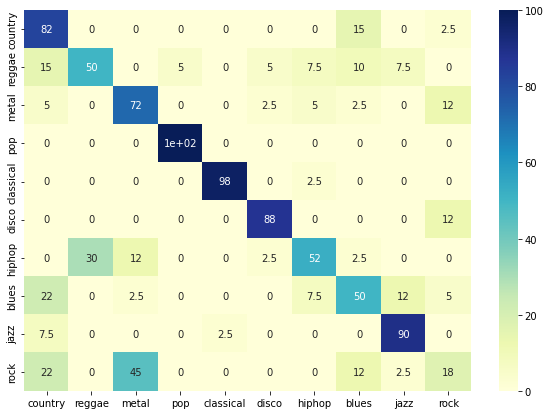

In [27]:
trainer_2.plot_confusion_matrix(test_dataloader)

In [28]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.53      0.82      0.65        40
      reggae       0.62      0.50      0.56        40
       metal       0.55      0.72      0.62        40
         pop       0.95      1.00      0.98        40
   classical       0.97      0.97      0.97        40
       disco       0.90      0.88      0.89        40
      hiphop       0.70      0.53      0.60        40
       blues       0.54      0.50      0.52        40
        jazz       0.80      0.90      0.85        40
        rock       0.35      0.17      0.23        40

    accuracy                           0.70       400
   macro avg       0.69      0.70      0.69       400
weighted avg       0.69      0.70      0.69       400

